<a href="https://colab.research.google.com/github/Bmartins25/Pyspark_Rural_/blob/main/Teste_Bruno_Pottencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=477da08703ca6fa315e88ea2d25eb096bf61ae5284df225d809b803db78d1ab0
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
file_path = "/content/R_RURAL_2021.xlsx"
df_pandas = pd.read_excel(file_path, sheet_name='R_RURAL_2021')

In [4]:
# Iniciando uma sessão do Spark
spark = SparkSession.builder.appName("SUSEP_Pottencial").getOrCreate()

In [5]:

df_spark = spark.createDataFrame(df_pandas)

In [6]:
df_spark.show()

+---------+-----------+--------+---------+-------+---------+-------+------+---------+-----------+--------+---+----------+--------+----------+---------+--------+--------+-------+----------+----------+----------+---------+---------+
|  COD_APO|COD_ENDOSSO|COD_ITEM|DATA_COMP|COD_END|COB_FUNDO|COD_MOD|ID_BEM|COBERTURA|    CULTURA|   MUNIC| UF|INICIO_VIG| FIM_VIG|TIPO_FRANQ|VAL_FRANQ|AREA_SEG| IMP_SEG| PREMIO|PREMIO_SUB|ORIGEM_SUB|CORRETAGEM|PERC_CARR|PERC_DESC|
+---------+-----------+--------+---------+-------+---------+-------+------+---------+-----------+--------+---+----------+--------+----------+---------+--------+--------+-------+----------+----------+----------+---------+---------+
|292582168|    4257666| 6889891|     2021|      0|        S|     60|    60|      999|9.9999999E7| 44372.0| MT|  20200903|20210903|         1|     10.0|     0.0|210000.0| 452.94|       0.0|         0|   7033.71|     20.0|      0.0|
|292582168|    4257666| 6889896|     2021|      0|        S|     60|    60| 

In [7]:
# Mostrar o esquema do DataFrame para entender a estrutura
df_spark.printSchema()



root
 |-- COD_APO: long (nullable = true)
 |-- COD_ENDOSSO: long (nullable = true)
 |-- COD_ITEM: long (nullable = true)
 |-- DATA_COMP: long (nullable = true)
 |-- COD_END: long (nullable = true)
 |-- COB_FUNDO: string (nullable = true)
 |-- COD_MOD: long (nullable = true)
 |-- ID_BEM: long (nullable = true)
 |-- COBERTURA: long (nullable = true)
 |-- CULTURA: double (nullable = true)
 |-- MUNIC: double (nullable = true)
 |-- UF: string (nullable = true)
 |-- INICIO_VIG: long (nullable = true)
 |-- FIM_VIG: long (nullable = true)
 |-- TIPO_FRANQ: long (nullable = true)
 |-- VAL_FRANQ: double (nullable = true)
 |-- AREA_SEG: double (nullable = true)
 |-- IMP_SEG: double (nullable = true)
 |-- PREMIO: double (nullable = true)
 |-- PREMIO_SUB: double (nullable = true)
 |-- ORIGEM_SUB: string (nullable = true)
 |-- CORRETAGEM: double (nullable = true)
 |-- PERC_CARR: double (nullable = true)
 |-- PERC_DESC: double (nullable = true)



In [8]:
# Análises Descritivas usando PySpark
# 1. Contagem de registros
print(f"Número total de registros: {df_spark.count()}")



Número total de registros: 1048575


In [9]:
# 2. Estatísticas descritivas básicas
df_spark.describe().show()



+-------+--------------------+------------------+--------------------+---------+-------------------+---------+------------------+------------------+------------------+--------------------+------------------+-------+--------------------+--------------------+-----------------+-------------------+-----------------+------------------+------------------+------------------+----------+------------------+-----------------+-----------------+
|summary|             COD_APO|       COD_ENDOSSO|            COD_ITEM|DATA_COMP|            COD_END|COB_FUNDO|           COD_MOD|            ID_BEM|         COBERTURA|             CULTURA|             MUNIC|     UF|          INICIO_VIG|             FIM_VIG|       TIPO_FRANQ|          VAL_FRANQ|         AREA_SEG|           IMP_SEG|            PREMIO|        PREMIO_SUB|ORIGEM_SUB|        CORRETAGEM|        PERC_CARR|        PERC_DESC|
+-------+--------------------+------------------+--------------------+---------+-------------------+---------+----------------

In [10]:
# 3. Contagem de valores nulos por coluna
from pyspark.sql.functions import col, sum
df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns]).show()



+-------+-----------+--------+---------+-------+---------+-------+------+---------+-------+-----+---+----------+-------+----------+---------+--------+-------+------+----------+----------+----------+---------+---------+
|COD_APO|COD_ENDOSSO|COD_ITEM|DATA_COMP|COD_END|COB_FUNDO|COD_MOD|ID_BEM|COBERTURA|CULTURA|MUNIC| UF|INICIO_VIG|FIM_VIG|TIPO_FRANQ|VAL_FRANQ|AREA_SEG|IMP_SEG|PREMIO|PREMIO_SUB|ORIGEM_SUB|CORRETAGEM|PERC_CARR|PERC_DESC|
+-------+-----------+--------+---------+-------+---------+-------+------+---------+-------+-----+---+----------+-------+----------+---------+--------+-------+------+----------+----------+----------+---------+---------+
|      0|          0|       0|        0|      0|        0|      0|     0|        0|      0|    0|  0|         0|      0|         0|        0|       0|      0|     0|         0|         0|         0|        0|        0|
+-------+-----------+--------+---------+-------+---------+-------+------+---------+-------+-----+---+----------+-------+----

In [15]:
# 5. Filtragem de dados
# Exemplo: Filtrar registros onde o valor de uma coluna é maior que um determinado limite
# Substitua 'PREMIO' pelo nome correto da coluna que você deseja filtrar
df_filtrado = df_spark.filter(df_spark["PREMIO"] > 1000)
df_filtrado.show()


+---------+-----------+--------+---------+-------+---------+-------+------+---------+-----------+-------+---+----------+--------+----------+---------+--------+---------+--------+----------+----------+----------+---------+---------+
|  COD_APO|COD_ENDOSSO|COD_ITEM|DATA_COMP|COD_END|COB_FUNDO|COD_MOD|ID_BEM|COBERTURA|    CULTURA|  MUNIC| UF|INICIO_VIG| FIM_VIG|TIPO_FRANQ|VAL_FRANQ|AREA_SEG|  IMP_SEG|  PREMIO|PREMIO_SUB|ORIGEM_SUB|CORRETAGEM|PERC_CARR|PERC_DESC|
+---------+-----------+--------+---------+-------+---------+-------+------+---------+-----------+-------+---+----------+--------+----------+---------+--------+---------+--------+----------+----------+----------+---------+---------+
|292582168|    4257666| 6889896|     2021|      0|        S|     60|    60|      100|9.9999999E7|44372.0| MT|  20200903|20210903|         1|     10.0|     0.0| 450000.0| 3535.82|       0.0|         0|   7033.71|     20.0|      0.0|
|292556275|    4219017| 6858237|     2021|      0|        S|     60|    

In [ ]:
# 4. Agrupamentos e Resumo por Categoria
# Agrupar por uma coluna específica e calcular a média de outra (exemplo: 'categoria' e 'valor')
# Substitua 'coluna_categoria' e 'coluna_valor' pelos nomes corretos das colunas no seu DataFrame
df_spark.groupBy("COD_APO").mean("PREMIO").show() # Exemplo usando 'COD_APO' como categoria e 'PREMIO' como valor

In [16]:
# 6. Análise de correlação
# Encontrar correlação entre duas variáveis numéricas
# Substitua 'PREMIO' e 'IMP_SEG' pelos nomes corretos das colunas numéricas que você deseja analisar
correlacao = df_spark.corr('PREMIO', 'IMP_SEG')
print(f"Correlação entre 'PREMIO' e 'IMP_SEG': {correlacao}")



Correlação entre 'PREMIO' e 'IMP_SEG': 0.39875562222795163


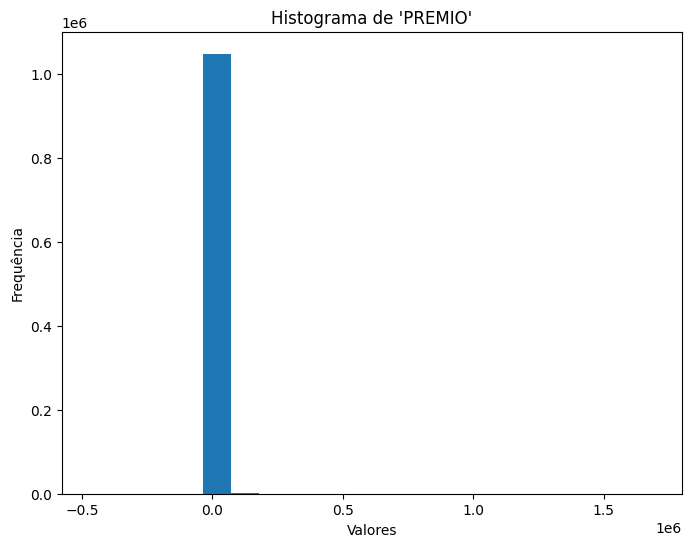

KeyboardInterrupt: 

In [19]:
# Encerrar a sessão do Spark
spark.stop()

# --- Gráficos com Matplotlib (usando pandas) ---

# Histograma para uma coluna numérica (substitua 'coluna_numerica' pela coluna real)
plt.figure(figsize=(8,6))
df_pandas['PREMIO'].hist(bins=20)
plt.title("Histograma de 'PREMIO'")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.grid(False)
plt.show()



In [ ]:
# Gráfico de Barras para uma coluna categórica
plt.figure(figsize=(10,6))
df_pandas['COD_APO'].value_counts().plot(kind='bar')
plt.title("Distribuição de 'COD_APO'")
plt.xlabel("Categoria")
plt.ylabel("Frequência")
plt.show()